In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("Exam_Score_Prediction.csv")
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,200.99,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,200.99,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,200.99,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,200.99,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,200.99,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df.head()


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,200.99,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,200.99,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,200.99,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,200.99,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,200.99,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


df["Gender"] = le.fit_transform(df["Gender"])
df["Course"] = le.fit_transform(df["Course"])
df["City"] = le.fit_transform(df["City"])

print(df.head())


KeyError: 'Gender'

In [5]:
df.columns


Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["gender"] = le.fit_transform(df["gender"])
df["course"] = le.fit_transform(df["course"])
df["internet_access"] = le.fit_transform(df["internet_access"])
df["sleep_quality"] = le.fit_transform(df["sleep_quality"])
df["study_method"] = le.fit_transform(df["study_method"])
df["facility_rating"] = le.fit_transform(df["facility_rating"])
df["exam_difficulty"] = le.fit_transform(df["exam_difficulty"])

print("Label Encoding done.")
df.head()


Label Encoding done.


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,200.99,17,1,6,2.78,92.9,1,7.4,2,0,1,1,58.9
1,200.99,23,2,5,3.37,64.8,1,4.6,0,3,2,2,54.8
2,200.99,22,1,1,7.88,76.8,1,8.5,2,0,0,2,90.3
3,200.99,20,2,6,0.67,48.4,1,5.8,0,3,1,2,29.7
4,200.99,20,0,6,0.89,71.6,1,9.8,2,0,1,2,43.7


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y = df["exam_score"]

X = df.drop(columns=["exam_score"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train/Test split done.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Train/Test split done.
X_train shape: (16000, 12)
X_test shape: (4000, 12)


In [8]:
corr = df.corr()["exam_score"].sort_values(ascending=False)

print("Top features affecting exam score:")
print(corr)

df.to_csv("cleaned_encoded_dataset.csv", index=False)

print("\nFile saved as cleaned_encoded_dataset.csv")


Top features affecting exam score:
exam_score          1.000000
study_hours         0.717788
class_attendance    0.308850
sleep_hours         0.133222
age                 0.006522
exam_difficulty     0.003432
student_id          0.003267
gender             -0.000428
course             -0.000448
internet_access    -0.007826
facility_rating    -0.071879
sleep_quality      -0.099725
study_method       -0.154610
Name: exam_score, dtype: float64

File saved as cleaned_encoded_dataset.csv


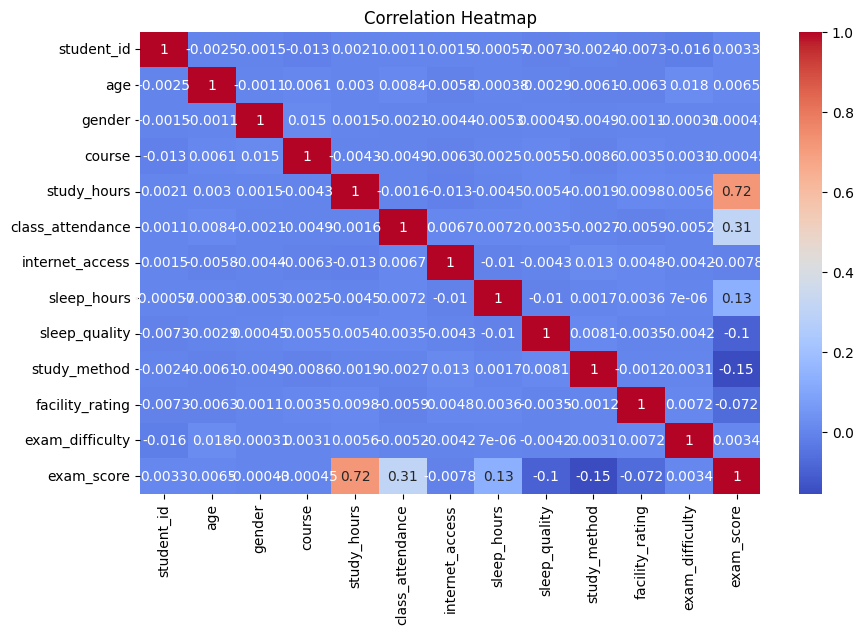

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)   

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Linear Regression Results:
Mean Squared Error: 118.95861015615583
R2 Score: 0.6674319207891077


c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


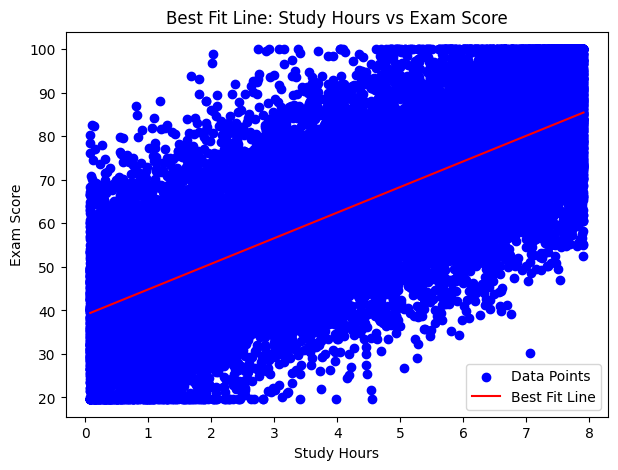

In [11]:


import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


X_single = df[["study_hours"]]     # 2D
y = df["exam_score"]


model2 = LinearRegression()
model2.fit(X_single, y)


x_line = np.linspace(X_single.min(), X_single.max(), 100)
y_line = model2.predict(x_line)


plt.figure(figsize=(7,5))
plt.scatter(X_single, y, color='blue', label='Data Points')
plt.plot(x_line, y_line, color='red', label='Best Fit Line')

plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Best Fit Line: Study Hours vs Exam Score")
plt.legend()
plt.show()
